In [23]:
### Importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score


In [62]:
dta = pd.read_csv("ma_schools.csv")
dta.sample(10)

,School Code,School Name,District Name,District Code,TOTAL_Enrollment,% English Language Learner,% Students With Disabilities,% Economically Disadvantaged,School Accountability Percentile (1-99)
1342,7750315,Chocksett Middle School,Wachusett,7750000,377,0.5,11.1,8.5,85.0
1204,8730605,So Shore Vocational Technical High,South Shore Regional Vocational Technical,8730000,636,0.0,30.8,25.6,45.0
1303,7700505,Tantasqua Regional Sr High,Tantasqua,7700000,760,0.1,5.9,12.9,67.0
182,350658,West Roxbury Academy,Boston,350000,496,26.4,21.4,59.5,4.0
1500,3480053,City View,Worcester,3480000,497,41.9,18.5,74.0,14.0
1520,3480515,North High,Worcester,3480000,1307,32.4,25.4,63.6,3.0
495,1000015,Hemenway,Framingham,1000000,573,9.2,20.6,18.0,85.0
470,6450305,Mattacheese Middle School,Dennis-Yarmouth,6450000,423,6.6,19.9,41.6,17.0
29,100505,Arlington High,Arlington,100000,1290,0.9,11.1,10.3,73.0
1539,39010900,Massachusetts Virtual Academy at Greenfield Co...,Massachusetts Virtual Academy at Greenfield Co...,39010000,667,1.0,18.1,47.8,7.0


The data needs to be preprocessed as the variables are on different scales. For K-Means, the proximity measure that is going to be used is Euclidean distance which is not scale invariant. Hence the variables need to be standardized. The categorical variables are removed. School code and school name is the unit of analysis and hence have to be removed. The district name information is contained within district code variable but when the variable is retained, the SSE obtained is higher. Hence both the district variables are removed. The dataframe will finally undergo standardization. 

In [65]:
### Preprocessing the data 
### Dropping unnecessary columns 

def job(df) :
    """
    Function to preprocess the data and get the SSE and silhouettte scores. 

    Arguments : 
    ~~~~~~~~~~~
    df : Dataframe object containing data to be processed

    Returns : 
    ~~~~~~~~~~
    output : Dictionary object contatining required outputs 
    """

    cols_to_drop = ["School Code", "School Name", "District Name", "District Code"]
    df = df.drop(columns = cols_to_drop)

    ### Standardizing the data
    st = StandardScaler() 
    df_process = pd.DataFrame(st.fit_transform(df))
    ### Setting the column names 
    df_process.columns = [col for col in list(df.columns) if col not in cols_to_drop] 
    ### Getting the squared sum errors 
    k_values = range(2, 11)
    sse_values =  [KMeans(n_clusters = i, init = 'random', random_state = 9).fit(df_process).inertia_ for i in k_values]
    
    ### Silhouette coefficient knee plot 

    sil_avg_scores = []

    for i in range(2,11) :
        km = KMeans(n_clusters = i, init = 'random', random_state = 9)
        cluster_labels = km.fit_predict(df_process)
        sil_avg_scores.append(silhouette_score(df_process, cluster_labels))
    
    output = {
        "sample_table" : df_process.head(5),
        "k_values" : k_values, 
        "sse_values" : sse_values, 
        "sil_avg_scores" : sil_avg_scores
    }

    return output
    


In [66]:
### First 5 rows of preprocessed data 
response_1 = job(dta.copy())
response_1['sample_table']

,TOTAL_Enrollment,% English Language Learner,% Students With Disabilities,% Economically Disadvantaged,School Accountability Percentile (1-99)
0,-0.316770,-0.553327,-0.948178,-0.431531,-0.342874
1,0.035437,-0.179680,-0.471036,-0.349430,-0.625935
2,-0.657971,-0.600032,-0.497543,-0.426970,-0.413639
3,-0.589181,-0.584464,-0.802384,-0.376797,0.010952
4,-0.080131,-0.709013,-0.338496,-0.258206,0.470926


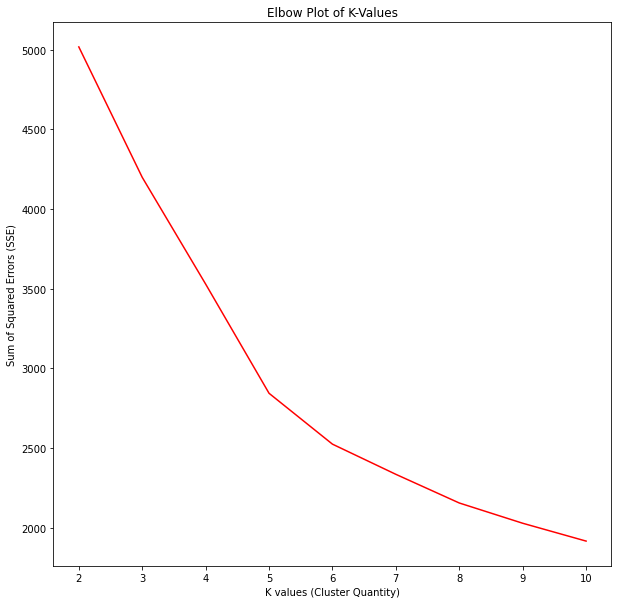

In [67]:
### Elbow plot 
k_values = response_1['k_values'] 
sse_values = response_1['sse_values']

### Plotting 
plt.figure(figsize=(10,10))
plt.title("Elbow Plot of K-Values")
plt.xlabel("K values (Cluster Quantity)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.plot(k_values, sse_values, color = 'red')
plt.show()

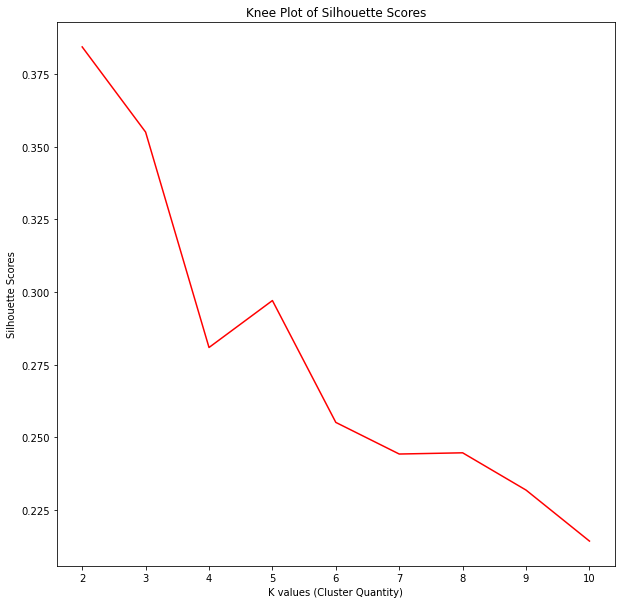

In [68]:
sil_avg_scores = response_1['sil_avg_scores']

### Plotting 
plt.figure(figsize=(10,10))
plt.title("Knee Plot of Silhouette Scores")
plt.xlabel("K values (Cluster Quantity)")
plt.ylabel("Silhouette Scores")
plt.plot(k_values, sil_avg_scores, color = 'red')
plt.show()

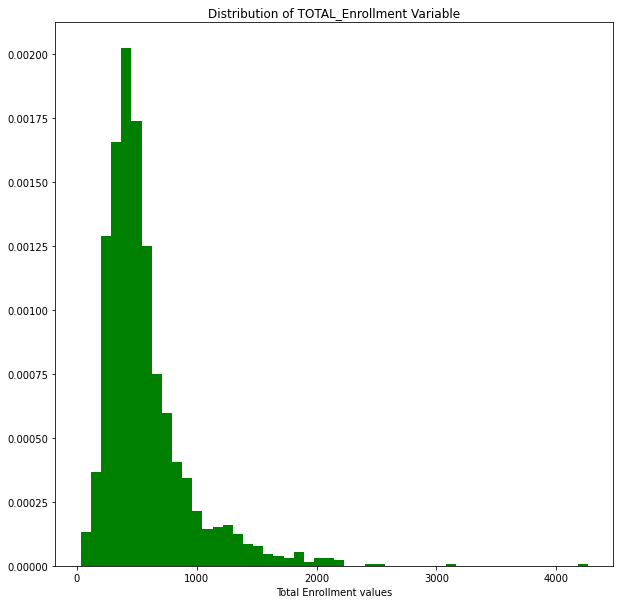

In [71]:
### Distribution of total enrollment 

total_enrollment = dta["TOTAL_Enrollment"]
sd_dist = np.std(total_enrollment)
mean_dist = np.mean(total_enrollment)
n_bins = 50

plt.figure(figsize=(10,10))
n, bins, _ = plt.hist(total_enrollment, n_bins, density = True, 
         histtype ='bar', color = 'green'
        )

#y = pass
plt.title("Distribution of TOTAL_Enrollment Variable")
plt.xlabel('Total Enrollment values')        
plt.show()  

In [40]:
quantile_75 = np.quantile(total_enrollment, 0.75)
quantile_25 = np.quantile(total_enrollment, 0.25)
IQR = quantile_75 - quantile_25
IQR

328.0

In [41]:
upper_range = quantile_75 + 1.5*IQR
upper_range

1165.0

In [42]:
mean_dist + 3*sd_dist

1657.3879487410597

In [72]:
df_outliers_rem = dta.drop(dta[dta.TOTAL_Enrollment > upper_range].index)
df_outliers_rem

,School Code,School Name,District Name,District Code,TOTAL_Enrollment,% English Language Learner,% Students With Disabilities,% Economically Disadvantaged,School Accountability Percentile (1-99)
0,10505,Abington High,Abington,10000,452,2.4,9.7,21.5,42.0
1,10003,Beaver Brook Elementary School,Abington,10000,580,7.2,13.3,23.3,34.0
2,10405,Frolio Middle School,Abington,10000,328,1.8,13.1,21.6,40.0
3,10015,Woodsdale Elementary School,Abington,10000,353,2.0,10.8,22.7,52.0
4,30025,Acushnet Elementary School,Acushnet,30000,538,0.4,14.3,25.3,65.0
...,...,...,...,...,...,...,...,...,...
1535,3480420,Worcester East Middle,Worcester,3480000,816,33.5,17.9,66.5,15.0
1537,3500010,Charles E Roderick,Wrentham,3500000,439,0.0,15.7,9.1,81.0
1538,35110205,Bentley Academy Charter School,Bentley Academy Charter School (District),35110000,257,13.6,16.3,62.6,24.0
1539,39010900,Massachusetts Virtual Academy at Greenfield Co...,Massachusetts Virtual Academy at Greenfield Co...,39010000,667,1.0,18.1,47.8,7.0


In [73]:
response_2 = job(df_outliers_rem.copy())

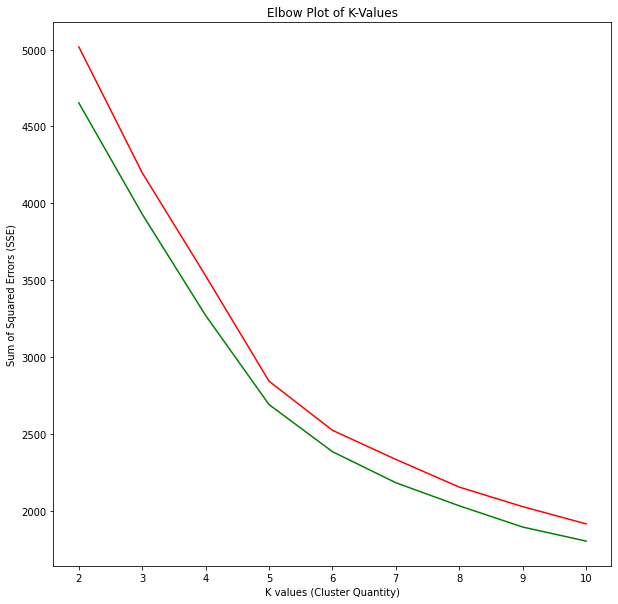

In [75]:
sse_values_1 = response_1['sse_values']
sse_values_2 = response_2['sse_values']

### Plotting 
plt.figure(figsize=(10,10))
plt.title("Elbow Plot of K-Values")
plt.xlabel("K values (Cluster Quantity)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.plot(k_values, sse_values_1, color = 'red')
plt.plot(k_values, sse_values_2, color = 'green')
plt.show()

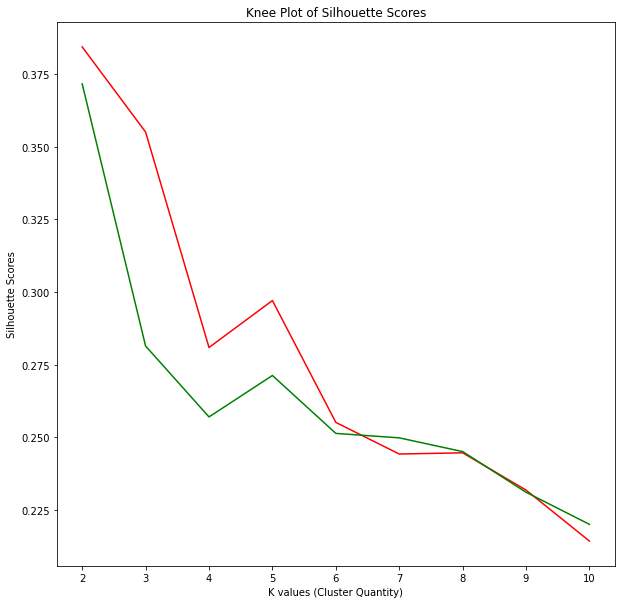

In [76]:
sil_avg_scores_1 = response_1['sil_avg_scores']
sil_avg_scores_2 = response_2['sil_avg_scores']

### Plotting 
plt.figure(figsize=(10,10))
plt.title("Knee Plot of Silhouette Scores")
plt.xlabel("K values (Cluster Quantity)")
plt.ylabel("Silhouette Scores")
plt.plot(k_values, sil_avg_scores_1, color = 'red')
plt.plot(k_values, sil_avg_scores_2, color = 'green')
plt.show()